In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import yfinance as yf

>MACD = 12-Period EMA − 26-Period EMA

The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. Traders may buy the security when the MACD crosses above its signal line and sell—or short—the security when the MACD crosses below the signal line. 


In [2]:
Stk = yf.Ticker("SPY")
df = Stk.history(start='2016-01-01')
df.reset_index(level=0, inplace=True)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-12-31,185.031928,185.717460,183.895370,183.895370,114877900,0.0,0
1,2016-01-04,180.846545,181.333631,179.132693,181.324615,222353500,0.0,0
2,2016-01-05,181.667361,182.118373,180.449639,181.631287,110845800,0.0,0
3,2016-01-06,178.907168,180.458648,178.239680,179.340149,152112600,0.0,0
4,2016-01-07,176.192125,178.095394,174.622600,175.037537,213436100,0.0,0
...,...,...,...,...,...,...,...,...
1410,2021-08-09,442.459991,442.799988,441.309998,442.130005,41222600,0.0,0
1411,2021-08-10,442.609985,443.440002,441.880005,442.679993,43339300,0.0,0
1412,2021-08-11,443.820007,443.880005,442.619995,443.779999,44034300,0.0,0
1413,2021-08-12,443.619995,445.260010,442.660004,445.109985,38909400,0.0,0


<AxesSubplot:xlabel='Date'>

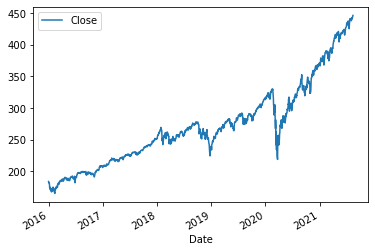

In [3]:
df.plot.line(x='Date', y='Close')

In [4]:
df_MACD = pd.DataFrame(data=df.Date)

df_MACD['EMA_12'] = df.Close.ewm(span=12).mean()
df_MACD['EMA_26'] = df.Close.ewm(span=26).mean()
df_MACD['MACD'] = df_MACD.EMA_12 - df_MACD.EMA_26
df_MACD['SIGNAL'] = df_MACD.MACD.ewm(span=9).mean()
df_MACD['MACD_Hist'] = df_MACD.MACD - df_MACD.SIGNAL
df_MACD

,Date,EMA_12,EMA_26,MACD,SIGNAL,MACD_Hist
0,2015-12-31,183.895370,183.895370,0.000000,0.000000,0.000000
1,2016-01-04,182.502878,182.560555,-0.057677,-0.032043,-0.025634
2,2016-01-05,182.162696,182.226678,-0.063982,-0.045133,-0.018850
3,2016-01-06,181.271728,181.419731,-0.148003,-0.079980,-0.068022
4,2016-01-07,179.577921,179.939674,-0.361753,-0.163801,-0.197952
...,...,...,...,...,...,...
1410,2021-08-09,439.552140,436.074755,3.477385,3.487871,-0.010486
1411,2021-08-10,440.033348,436.564032,3.469316,3.484160,-0.014844
1412,2021-08-11,440.609756,437.098548,3.511208,3.489570,0.021638
1413,2021-08-12,441.302099,437.691988,3.610111,3.513678,0.096433


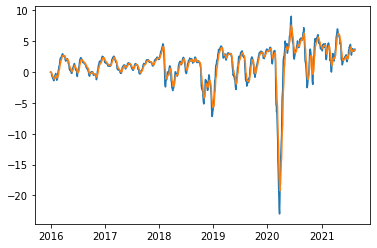

In [5]:
plt.plot(df_MACD.Date, df_MACD.MACD)
plt.plot(df_MACD.Date, df_MACD.SIGNAL)
